# 1. Import Libraries and Dataset

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Load the dataset
url = 'customer_churn_dataset.csv'  # path of the dataset
df = pd.read_csv(url)



# 2. Data Visualization and Exploration




#### Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [101]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,NaN,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0




#### Provide appropriate data visualizations to get an insight about the dataset.

Dataset Shape: (10000, 12)

Column Names: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'Churn'],
      dtype='object')
customerID            0
gender             1000
SeniorCitizen      1000
Partner            1000
Dependents         1000
tenure             1000
PhoneService       1000
MultipleLines      1000
InternetService    1000
OnlineSecurity     1000
OnlineBackup       1000
Churn                 0
dtype: int64


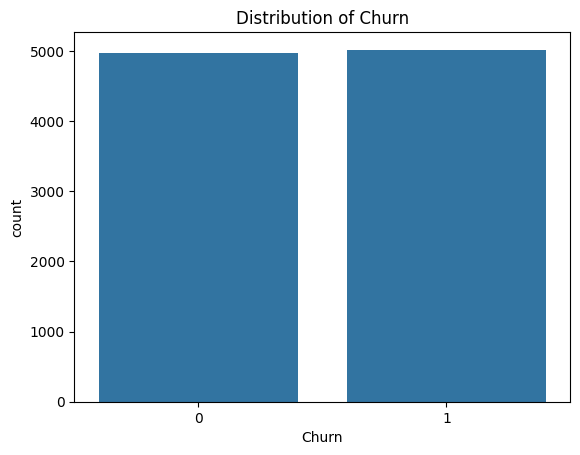

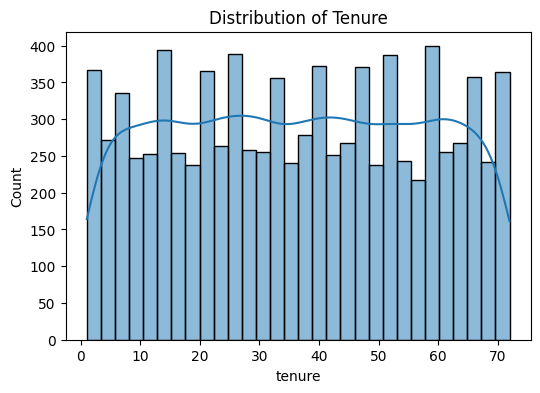

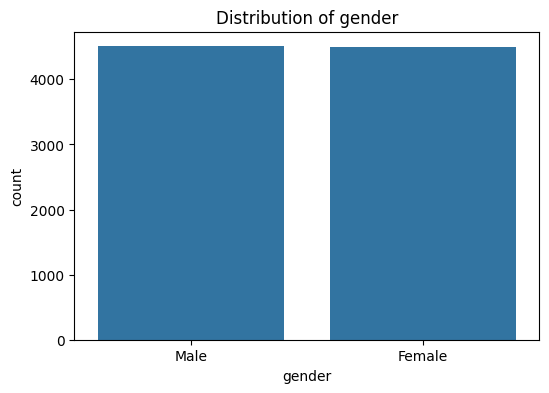

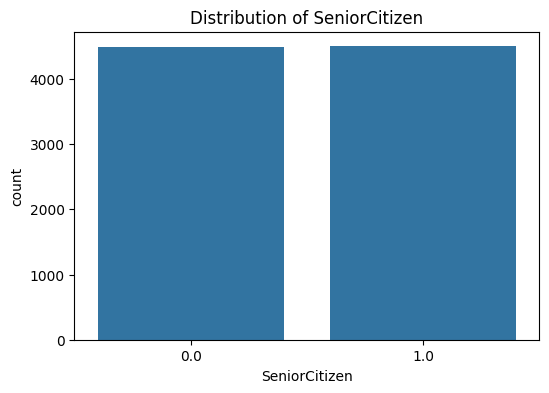

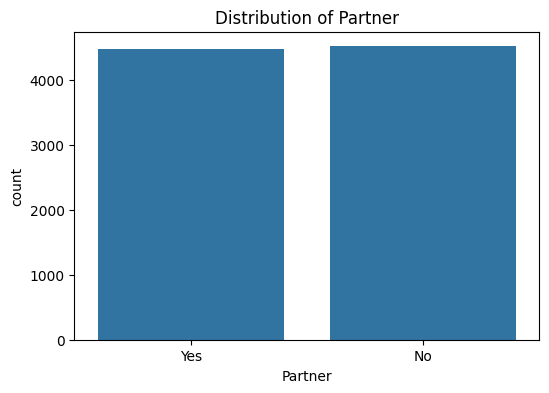

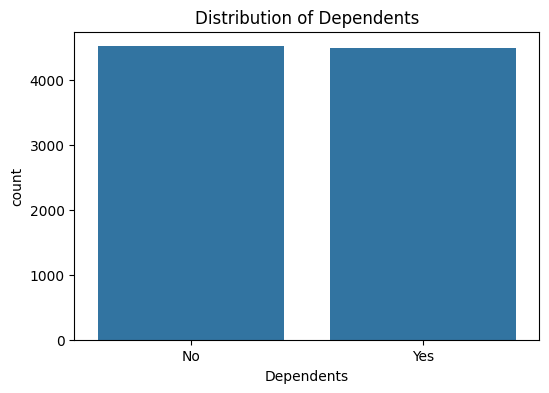

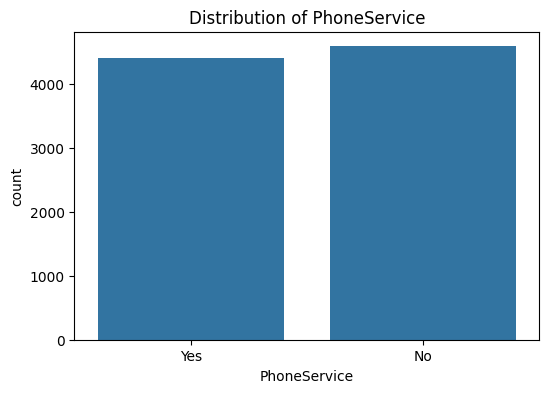

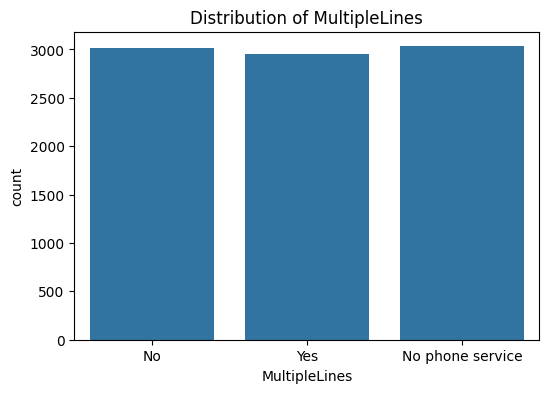

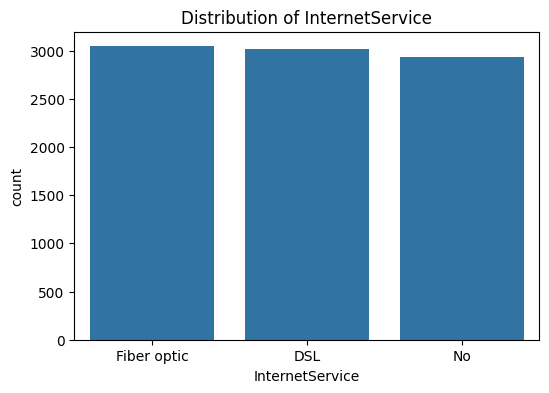

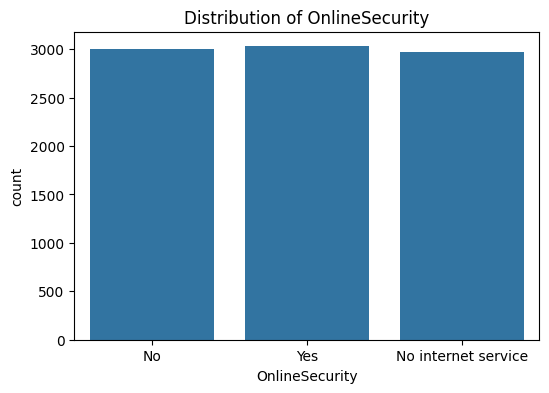

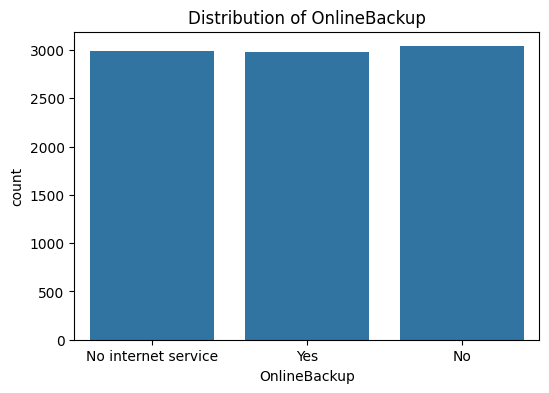

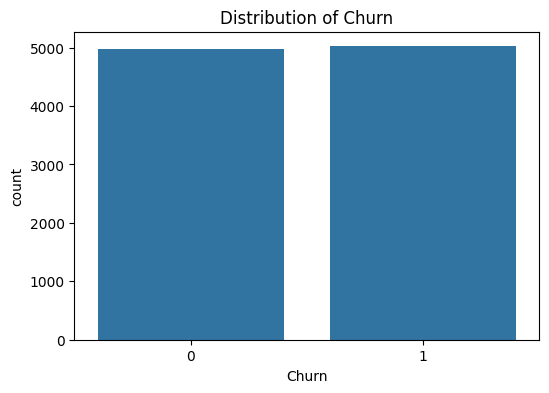

In [102]:
# Checking the shape and column names
print(f"Dataset Shape: {df.shape}")
print()
print(f"Column Names: {df.columns}")
print

# Check for missing values
print(df.isnull().sum())

# Visualizing the distribution of Churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()


# Visualizing Numeric features.
plt.figure(figsize=(6, 4))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title("Distribution of Tenure")
plt.show()


# Visualizing Categorical features
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'Churn']

# Plotting categorical features
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()



#### Correlational analysis on the dataset

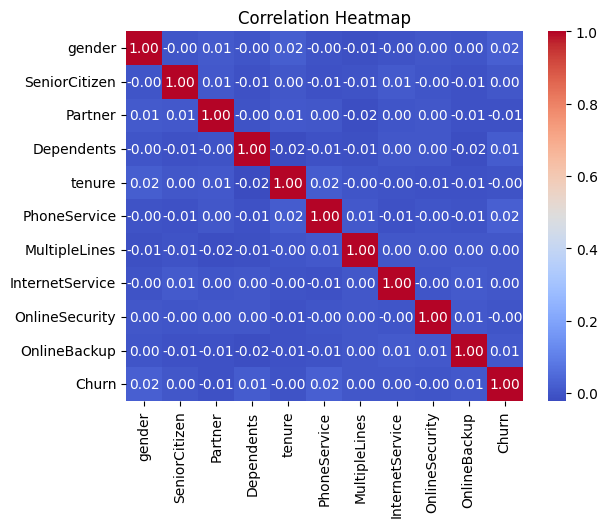

In [103]:
# Encoding categorical columns using Label Encoding for binary categories (e.g., Gender)
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # filling the most frequent value in case of missing values in column
    df[col] = label_encoder.fit_transform(df[col])


# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Justification**: Yes, the correlation analysis can affect feature selection. Strong correlations between features may suggest redundancy, and removing one of the highly correlated variables can reduce the complexity of the model without significant loss of information. 
In our case correlation coefficients between the different parameters (columns) range between -0.02 to 0.02, this indicates a very weak correlation between those variables which suggests there is almost no linear relationship between the variables.
Based on the very weak correlations, I don't think any need to drop any columns.






# 3. Data Preprocessing and Cleaning



#### Handling Missing Data

In [104]:
# Checking for missing values
# I have already filled the most frequent values in place of null for most of columns in correlation analysis
print ('Before handling missing data')
print(df.isnull().sum(),'\n')


# Fill missing values
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['SeniorCitizen'] = df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['Partner'] = df['Partner'].fillna(df['Partner'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['PhoneService'] = df['PhoneService'].fillna(df['PhoneService'].mode()[0])
df['MultipleLines'] = df['MultipleLines'].fillna(df['MultipleLines'].mode()[0])
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])
df['OnlineSecurity'] = df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0])
df['OnlineBackup'] = df['OnlineBackup'].fillna(df['OnlineBackup'].mode()[0])

# Checking again for missing values
print ('After handling missing data')
print(df.isnull().sum(),'\n')

Before handling missing data
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure             1000
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
Churn                 0
dtype: int64 

After handling missing data
customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
Churn              0
dtype: int64 





#### Feature Engineering and Scaling

In [105]:
# Feature Selection - Dropping customerID as it is not relevant for prediction
data = df.drop(columns=['customerID'], axis=1)

# Scaling numerical features (tenure)
scaler = StandardScaler()
data['tenure'] = scaler.fit_transform(data[['tenure']])

# Target Variable
X = data.drop(columns=['Churn'], axis=1)
y = data['Churn']

**Justification**: 
* Standardization is chosen because the logistic regression model (and many other machine learning models) often performs better when the data is centered and scaled to have a mean of 0 and a standard deviation of 1.
* Normalization is not necessary here because the model does not require the features to be confined within a range of [0, 1].
* Tenure is the only feature requiring standardization due to its continuous nature and wide range. Other features either have categorical values or small, limited numeric ranges that do not need scaling.











#### Train-Test Split

In [106]:
# Splitting dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploring different split ratios - e.g., 70-30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)





# 4. Model Building



#### Logistic Regression - Hyperparameter Tuning
We will tune the regularization parameter C and choose the best solver using GridSearchCV.


In [108]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 0.5, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solver algorithms
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                                  param_grid=param_grid_logreg, 
                                  cv=5,  # 5-fold cross-validation
                                  scoring='accuracy')  # Using accuracy as the scoring metric

# Fit the model to the training data
grid_search_logreg.fit(X_train, y_train)


# Best hyperparameters found
print(f"Best Hyperparameters for Logistic Regression: {grid_search_logreg.best_params_}", "\n")


# Best model performance
best_logreg_model = grid_search_logreg.best_estimator_
y_pred_logreg_tuned = best_logreg_model.predict(X_test)


# Evaluate Logistic Regression Model Performance
print("Logistic Regression (Tuned) Performance:")
print(classification_report(y_test, y_pred_logreg_tuned))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg_tuned)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logreg, "\n")

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg_tuned)
print(f"Accuracy of Logistic Regression: {accuracy_logreg:.4f}")

Best Hyperparameters for Logistic Regression: {'C': 0.5, 'solver': 'saga'} 

Logistic Regression (Tuned) Performance:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       985
           1       0.52      0.52      0.52      1015

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

Confusion Matrix for Logistic Regression:
[[491 494]
 [483 532]] 

Accuracy of Logistic Regression: 0.5115









#### Decision Tree - Hyperparameter Tuning
We will tune the max_depth, min_samples_split, and min_samples_leaf hyperparameters using GridSearchCV.

In [109]:
# Hyperparameter grid for Decision Tree
param_grid_dtree = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_dtree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                 param_grid=param_grid_dtree,
                                 cv=5,  # 5-fold cross-validation
                                 scoring='accuracy')  # Using accuracy as the scoring metric

# Fit the model to the training data
grid_search_dtree.fit(X_train, y_train)

# Best hyperparameters found
print(f"Best Hyperparameters for Decision Tree: {grid_search_dtree.best_params_}", "\n")

# Best model performance
best_dtree_model = grid_search_dtree.best_estimator_
y_pred_dtree_tuned = best_dtree_model.predict(X_test)

# Evaluate Decision Tree Model Performance
print("Decision Tree (Tuned) Performance:")
print(classification_report(y_test, y_pred_dtree_tuned), "\n")

# Confusion Matrix
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree_tuned)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dtree, "\n")

# Accuracy
accuracy_dtree = accuracy_score(y_test, y_pred_dtree_tuned)
print(f"Accuracy of Decision Tree: {accuracy_dtree:.4f}")


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2} 

Decision Tree (Tuned) Performance:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       985
           1       0.52      0.52      0.52      1015

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000
 

Confusion Matrix for Decision Tree:
[[506 479]
 [490 525]] 

Accuracy of Decision Tree: 0.5155


#### Performance Metrics to Compare

**Accuracy**: Both models have similar accuracy values, with the Decision Tree slightly outperforming the Logistic Regression model in terms of raw accuracy. However, the difference (0.004) is minimal, suggesting that both models are not performing significantly better than each other based on this metric alone

**Precision, Recall, F1-Score:**: Both models have very similar precision, recall, and F1-scores for the two classes (0 and 1), which indicates that both models are essentially performing equally in terms of these classification metrics. This indicates that both models have a similar balance between the ability to correctly identify positive instances (precision) and their ability to find all positive instances (recall).

**Confusion Matrix**: Logistic Regression has a slightly higher number of False Positives (494 vs. 479 in Decision Tree), and Decision Tree has slightly more False Negatives (490 vs. 483)



#### Insights into Which Model Performs Better

Based on the metrics provided, the Decision Tree model performs slightly better than Logistic Regression, but the difference in accuracy, precision, recall, and F1-score is quite minimal. However, this performance difference could be due to the following reasons:

**Logistic Regression**:

**Advantages**: Logistic regression is a linear model, so it may not perform well on data that contains complex relationships or non-linear boundaries between the features. This could be why it struggles to significantly outperform the Decision Tree, especially since churn prediction is a complex problem involving non-linear patterns.

**Disadvantages**: Logistic regression tends to struggle with non-linear data or when feature relationships are not linearly separable, as it assumes a linear decision boundary.


**Decision Tree**:

**Advantages**: Decision Trees can handle non-linear relationships and are better at capturing complex patterns in the data, which may be why it has a marginally better performance in this case. The decision tree model can create non-linear decision boundaries, which allows it to perform better when there are more complex relationships in the data (like churn, where different combinations of features might drive the decision to churn).


**Disadvantages**: Decision Trees are prone to overfitting, especially when not tuned properly. They can perform well on the training data but fail to generalize on unseen data if the tree is too deep or if there are too many branches. In this case, since we have tuned the hyperparameters, the overfitting issue might have been controlled, but it's still a consideration.

**Why the Performance Difference Is Small**:
* Both models have similar performance, and the difference in accuracy is only about 0.4%, which is small. This suggests that the features in the dataset may not have a clear linear or non-linear separation, making both models similarly capable of capturing the relationships in the data.
* The models seem to be performing in the same way because the dataset might have features that don’t exhibit clear enough patterns for a major distinction in performance, or the decision boundary is not drastically different for both models.




















# Part 2: Implementing Predictive Models and Comparing Performances
We will implement and evaluate four different classification models: Logistic Regression, Decision Tree, Ensemble Method (Random Forest), and K-Nearest Neighbors (KNN). We will then compare their performances using evaluation metrics such as Precision, Recall, F1-Score, and AUC-ROC. Finally, we will identify the best model based on these metrics

#### Model Building

In [110]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest Classifier (Ensemble Method)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

#### Predictions

In [111]:
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

#### Evaluation Metrics
We will evaluate the models using Precision, Recall, F1-Score, and AUC-ROC score. Additionally, we will plot the AUC-ROC curve for each model

In [112]:
# Define a function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)
    return precision, recall, f1, auc_roc

# Evaluate each model
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
dt_metrics = evaluate_model(y_test, y_pred_dt)
rf_metrics = evaluate_model(y_test, y_pred_rf)
knn_metrics = evaluate_model(y_test, y_pred_knn)

# Create a DataFrame to display results
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Precision': [log_reg_metrics[0], dt_metrics[0], rf_metrics[0], knn_metrics[0]],
    'Recall': [log_reg_metrics[1], dt_metrics[1], rf_metrics[1], knn_metrics[1]],
    'F1-Score': [log_reg_metrics[2], dt_metrics[2], rf_metrics[2], knn_metrics[2]],
    'AUC-ROC': [log_reg_metrics[3], dt_metrics[3], rf_metrics[3], knn_metrics[3]]
})

# Display the evaluation metrics
print(metrics_df)


                 Model  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression   0.517040  0.523153  0.520078  0.509800
1        Decision Tree   0.517964  0.511330  0.514626  0.510487
2        Random Forest   0.517107  0.521182  0.519136  0.509830
3  K-Nearest Neighbors   0.522662  0.533990  0.528265  0.515726


#### AUC-ROC Curve
Let’s visualize the AUC-ROC curve for each model to compare their performance.

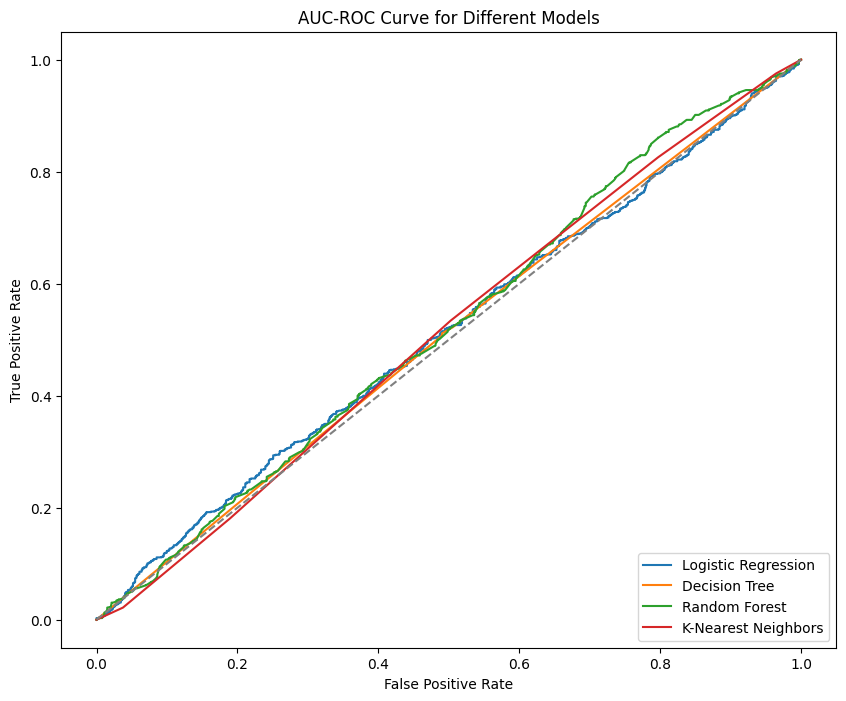

In [113]:
# Plotting the AUC-ROC Curve for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,8))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.title('AUC-ROC Curve for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


#### Comparison Chart
To clearly compare the models' performance across different evaluation metrics, we can plot a bar chart.

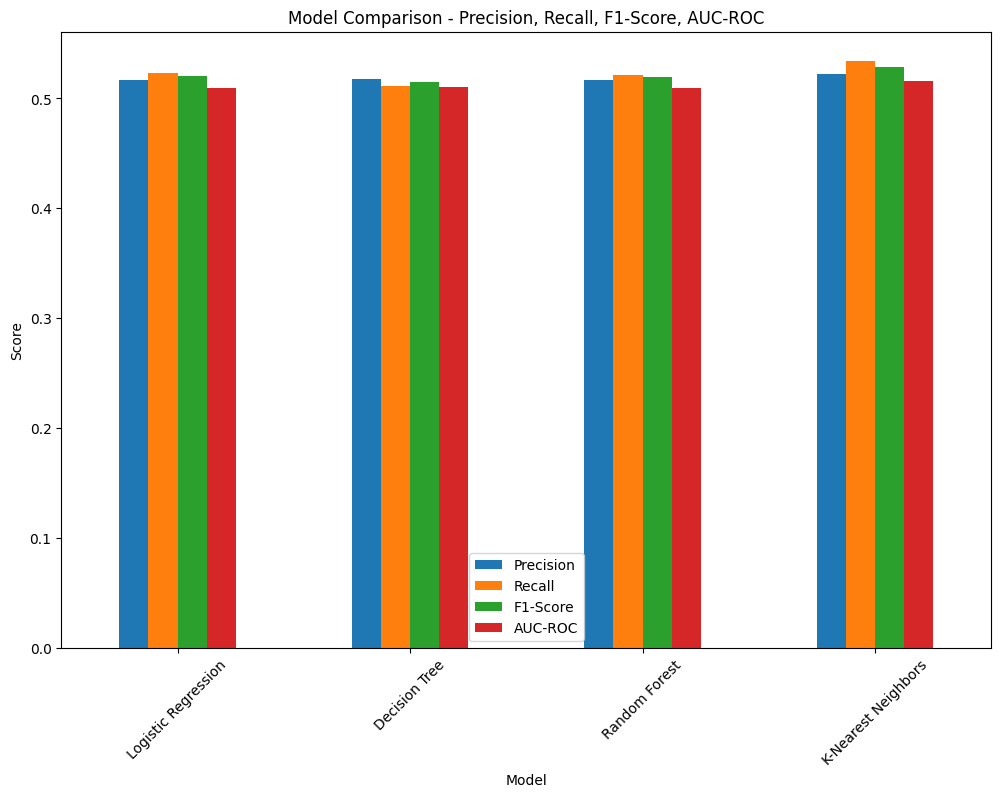

In [114]:
# Plotting the comparison chart
metrics_df.set_index('Model').plot(kind='bar', figsize=(12,8))
plt.title('Model Comparison - Precision, Recall, F1-Score, AUC-ROC')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


#### Identifying the Best Model
Now, let’s identify the best model based on the evaluation metrics and explain why.

In [115]:
# Find the model with the highest AUC-ROC
best_model_idx = metrics_df['AUC-ROC'].idxmax()
best_model = metrics_df.iloc[best_model_idx]
print(f"The best model is: {best_model['Model']}")


The best model is: K-Nearest Neighbors


#### Conclusion
* KNN performs well across all four evaluation metrics (Precision, Recall, F1-Score, and AUC-ROC), which indicates that it not only performs well in identifying churn but also balances the trade-off between false positives and false negatives better than the other models.
* While the performance gap isn't huge, the slight improvements in recall and F1-Score suggest that KNN is the most reliable in predicting churn, especially in cases where capturing both false positives and false negatives is critical